Best total loss: 1333.8848422904036
  walk_cost: 1249.2258953827534
  overflow_cost: 73.0
  imbalance_cost: 7.658946907650304
  build_cost: 4.0
  active stations: [0 1 2 3 4 5 6 7]


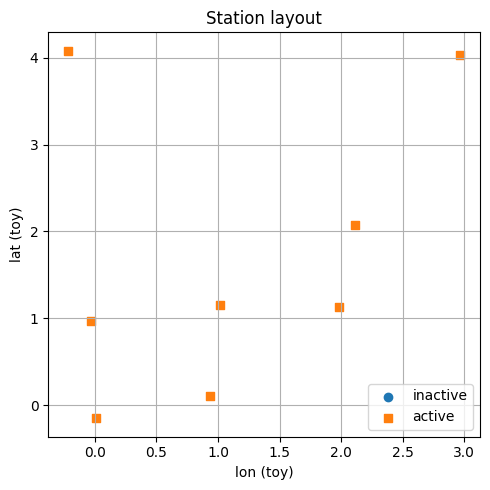

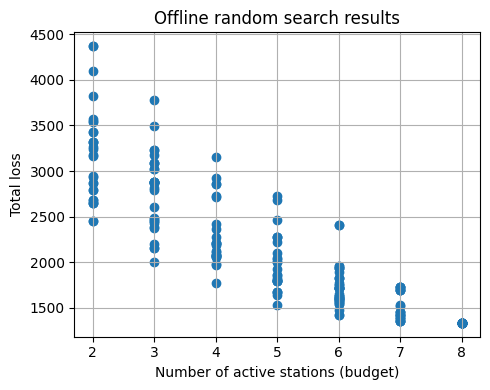

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.data_prep import load_data
from src.offline_model import random_search
from src.viz import plot_station_layout, plot_offline_history

D, Dist, cap, meta, stations = load_data("data/processed")

best, history = random_search(
    D, Dist, cap,
    budget_min=2,
    budget_max=8,
    n_samples=200,
    alpha_walk=1.0,
    lam_over=1.0,
    mu_imb=1.0,
    eta_build=0.5,
    rng_seed=42,
)

print("Best total loss:", best["total"])
print("  walk_cost:", best["walk_cost"])
print("  overflow_cost:", best["overflow_cost"])
print("  imbalance_cost:", best["imbalance_cost"])
print("  build_cost:", best["build_cost"])
print("  active stations:", np.where(best["y"] > 0.5)[0])

plot_station_layout(stations, y=best["y"])
plot_offline_history(history)
